In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df_products = pd.read_csv("cproducts.csv")
df_tender = pd.read_csv("ctender.csv")

In [45]:
df_products.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_20482,1975-10-20,male,MADHYA PRADESH,453441.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1000446431,PATANJALI CHOCOS 125g,55.00,Payback
1,BBID_20485,1955-07-21,female,NaN,999999.0,2017-03-09,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,NaN,1000010431,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback
2,BBID_20498,1981-03-19,female,MAHARASHTRA,400064.0,2015-08-12,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,0000971754,AD 399 FLAT LADIES JEANS FASHION EXC,1000077851005,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback
3,BBID_20499,1986-05-10,male,MAHARASHTRA,400099.0,2016-12-18,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,NaN,1000443231,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback
4,BBID_204110,1988-02-29,male,MADHYA PRADESH,474001.0,2015-12-31,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,0000974126,NMP 5% OFF CONCEPT DISCOUNT 2655,300481741,MAGGI NDL MERI MASALA PP 70g,34.20,Payback


In [46]:
df_products.isnull().sum()

customerID                       0
DOB                            319
Gender                        1028
State                         1583
PinCode                        817
transactionDate                  0
store_code                       0
store_description                0
till_no                          0
transaction_number_by_till       0
promo_code                       0
promotion_description         8510
product_code                     0
product_description              0
sale_price_after_promo           0
discountUsed                     0
dtype: int64

In [47]:
df_products.shape

(11972, 16)

In [48]:
df_products.nunique()

customerID                    10410
DOB                            7026
Gender                            2
State                            37
PinCode                        1353
transactionDate                 790
store_code                        7
store_description                 7
till_no                          25
transaction_number_by_till    11127
promo_code                     2214
promotion_description          2010
product_code                   6000
product_description            5997
sale_price_after_promo         2945
discountUsed                     28
dtype: int64

In [49]:
df_products["customerID"].value_counts()  #frequency of orders per customer

BBID_211419317    7
BBID_20439072     6
BBID_21144074     6
BBID_2041210      6
BBID_20470588     6
                 ..
BBID_20493900     1
BBID_20417218     1
BBID_211426840    1
BBID_20481312     1
BBID_2043333      1
Name: customerID, Length: 10410, dtype: int64

In [50]:
df_tender.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed
0,BBID_2044,1984-04-02,male,NaN,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,GVOWN,9208,1000.00,GiftVoucher
1,BBID_2044,1984-04-02,male,NaN,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,CASH,9208,10.46,CASH
2,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,EDCAXIS,90269,677.28,AXIS
3,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,MOBI,90268,1042.00,One MobiKwik Systems
4,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,MOBI,90269,1000.00,One MobiKwik Systems


In [51]:
df_tender.shape

(149752, 13)

In [52]:
df_tender.isnull().sum()

customerID                        0
DOB                            4596
Gender                         6663
State                         11650
PinCode                        5564
transactionDate                   0
store_code                        0
store_description                 0
till_no                           0
tender_type                       0
transaction_number_by_till        0
payment_amount_by_tender          0
PaymentUsed                    1223
dtype: int64

In [53]:
df_tender.nunique()

customerID                     9380
DOB                            6561
Gender                            2
State                            37
PinCode                        1219
transactionDate                 792
store_code                        7
store_description                 7
till_no                          25
tender_type                      45
transaction_number_by_till    69460
payment_amount_by_tender      74237
PaymentUsed                      33
dtype: int64

In [54]:
df_tender['customerID'].value_counts()

BBID_20453330     699
BBID_211419317    355
BBID_20444232     335
BBID_211414981    321
BBID_2043082      300
                 ... 
BBID_20460812       1
BBID_20480132       1
BBID_211435524      1
BBID_21147573       1
BBID_21146934       1
Name: customerID, Length: 9380, dtype: int64

In [55]:
newdf = pd.merge(df_products,df_tender,how="inner")

In [56]:
newdf.shape

(14466, 19)

In [57]:
newdf.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,tender_type,payment_amount_by_tender,PaymentUsed
0,BBID_20482,1975-10-20,male,MADHYA PRADESH,453441.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1000446431,PATANJALI CHOCOS 125g,55.00,Payback,EDCUBI,65.00,UBI CREDIT CARD
1,BBID_20498,1981-03-19,female,MAHARASHTRA,400064.0,2015-08-12,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,0000971754,AD 399 FLAT LADIES JEANS FASHION EXC,1000077851005,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback,CASH,768.45,CASH
2,BBID_20499,1986-05-10,male,MAHARASHTRA,400099.0,2016-12-18,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,NaN,1000443231,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback,MOBI,1701.24,One MobiKwik Systems
3,BBID_204110,1988-02-29,male,MADHYA PRADESH,474001.0,2015-12-31,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,0000974126,NMP 5% OFF CONCEPT DISCOUNT 2655,300481741,MAGGI NDL MERI MASALA PP 70g,34.20,Payback,CASH,224.89,CASH
4,BBID_204149,1977-04-11,male,MAHARASHTRA,401105.0,2016-11-08,2906,BB-INDORE-TREASURE ISLAND,11,33822,0001203034,"AZ 1@349,2@599 FLAT REG TERRY BATH TOWEL",1000479429005,"SS16 GREEKY Bath Tow, 70CM X 1.4 M, TEAL",1503.75,Payback,EDCSBI,21813.00,SBI CREDIT CARD


In [58]:
duplicate = newdf[newdf.duplicated()]
duplicate   # no duplicate rows

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,tender_type,payment_amount_by_tender,PaymentUsed


In [59]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14466 entries, 0 to 14465
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerID                  14466 non-null  object 
 1   DOB                         13857 non-null  object 
 2   Gender                      13646 non-null  object 
 3   State                       13533 non-null  object 
 4   PinCode                     13742 non-null  float64
 5   transactionDate             14466 non-null  object 
 6   store_code                  14466 non-null  int64  
 7   store_description           14466 non-null  object 
 8   till_no                     14466 non-null  int64  
 9   transaction_number_by_till  14466 non-null  int64  
 10  promo_code                  14466 non-null  object 
 11  promotion_description       4211 non-null   object 
 12  product_code                14466 non-null  int64  
 13  product_description         144

In [60]:
newdf.isnull().sum()/newdf.shape[0] * 100

customerID                     0.000000
DOB                            4.209871
Gender                         5.668464
State                          6.449606
PinCode                        5.004839
transactionDate                0.000000
store_code                     0.000000
store_description              0.000000
till_no                        0.000000
transaction_number_by_till     0.000000
promo_code                     0.000000
promotion_description         70.890364
product_code                   0.000000
product_description            0.000000
sale_price_after_promo         0.000000
discountUsed                   0.000000
tender_type                    0.000000
payment_amount_by_tender       0.000000
PaymentUsed                    0.912484
dtype: float64

### We can remove some columns which are not useful for us.

Pincode, Promotion_description, Product_code, Product_description, Sale_price_after_promo, store_description

In [61]:
newdf.drop(newdf.columns[[4,7,11,12,13,14]], axis = 1, inplace = True)

In [62]:
newdf.head()

,customerID,DOB,Gender,State,transactionDate,store_code,till_no,transaction_number_by_till,promo_code,discountUsed,tender_type,payment_amount_by_tender,PaymentUsed
0,BBID_20482,1975-10-20,male,MADHYA PRADESH,2016-05-01,2655,2,85246,NONPROMO,Payback,EDCUBI,65.00,UBI CREDIT CARD
1,BBID_20498,1981-03-19,female,MAHARASHTRA,2015-08-12,2655,13,1064,0000971754,Payback,CASH,768.45,CASH
2,BBID_20499,1986-05-10,male,MAHARASHTRA,2016-12-18,2615,14,51080,NONPROMO,Payback,MOBI,1701.24,One MobiKwik Systems
3,BBID_204110,1988-02-29,male,MADHYA PRADESH,2015-12-31,2655,9,21911,0000974126,Payback,CASH,224.89,CASH
4,BBID_204149,1977-04-11,male,MAHARASHTRA,2016-11-08,2906,11,33822,0001203034,Payback,EDCSBI,21813.00,SBI CREDIT CARD


In [63]:
newdf.dropna(inplace=True)

In [64]:
newdf['DOB'] = pd.to_datetime(newdf['DOB'],format='%Y-%m-%d',errors='coerce')
newdf['transactionDate'] = pd.to_datetime(newdf['transactionDate'],format='%Y-%m-%d',errors='coerce')
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12687 entries, 0 to 14465
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerID                  12687 non-null  object        
 1   DOB                         12681 non-null  datetime64[ns]
 2   Gender                      12687 non-null  object        
 3   State                       12687 non-null  object        
 4   transactionDate             12687 non-null  datetime64[ns]
 5   store_code                  12687 non-null  int64         
 6   till_no                     12687 non-null  int64         
 7   transaction_number_by_till  12687 non-null  int64         
 8   promo_code                  12687 non-null  object        
 9   discountUsed                12687 non-null  object        
 10  tender_type                 12687 non-null  object        
 11  payment_amount_by_tender    12687 non-null  float64   

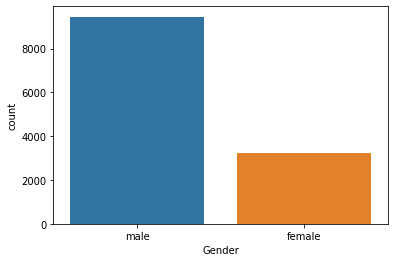

In [65]:
sns.countplot(newdf['Gender'])

We have a lot of male customers as compared to female.

In [66]:
newdf['State'].value_counts()

MADHYA PRADESH        4173
KARNATAKA             2453
JHARKHAND             1779
PUNJAB                1660
TAMIL NADU            1494
TAMILNADU              213
MAHARASHTRA            205
UTTAR PRADESH          124
WEST BENGAL            119
DELHI                   68
BIHAR                   58
ORISSA                  54
ANDHRA PRADESH          45
GUJARAT                 43
RAJASTHAN               38
HARYANA                 31
CHATTISGARH             29
KERALA                  24
HARAYANA                18
x                       12
GOA                      8
HIMACHAL PRADESH         6
CHANDIGARH               6
UTTARANCHAL              5
ASSAM                    4
JAMMU AND KASHMIR        3
CHHATTISGARH             3
KARNATAK                 2
MADHYA  PRADESH          2
MP                       2
DUMMY                    1
TRIPURA                  1
Other                    1
Jharkhand                1
UTTAR PRADESH EAST       1
SIKKIM                   1
Name: State, dtype: int64

We see many states that have been categorised into differnt states due to a change in spellings. We need to correct this.

In [67]:
state = newdf['State'].unique()
state.sort()
print(state)

['ANDHRA PRADESH' 'ASSAM' 'BIHAR' 'CHANDIGARH' 'CHATTISGARH'
 'CHHATTISGARH' 'DELHI' 'DUMMY' 'GOA' 'GUJARAT' 'HARAYANA' 'HARYANA'
 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR' 'JHARKHAND' 'Jharkhand' 'KARNATAK'
 'KARNATAKA' 'KERALA' 'MADHYA  PRADESH' 'MADHYA PRADESH' 'MAHARASHTRA'
 'MP' 'ORISSA' 'Other' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TAMILNADU' 'TRIPURA' 'UTTAR PRADESH' 'UTTAR PRADESH EAST' 'UTTARANCHAL'
 'WEST BENGAL' 'x']


In [68]:
newdf['State'] = newdf['State'].str.replace('CHHATTISGARH','CHATTISGARH')
newdf['State'] = newdf['State'].str.replace('HARYANA','HARAYANA')
newdf['State'] = newdf['State'].str.replace('Jharkhand','JHARKHAND')
newdf['State'] = newdf['State'].str.replace('KARNATAK','KARNATAKA')
newdf['State'] = newdf['State'].str.replace('MADHYA  PRADESH','MADHYA PRADESH')
newdf['State'] = newdf['State'].str.replace('MP','MADHYA PRADESH')
newdf['State'] = newdf['State'].str.replace('MADHYA  PRADESH','MADHYA PRADESH')
newdf['State'] = newdf['State'].str.replace('TAMILNADU','TAMIL NADU')
newdf['State'] = newdf['State'].str.replace('MADHYA  PRADESH','MADHYA PRADESH')
newdf['State'] = newdf['State'].str.replace('UTTAR PRADESH EAST','UTTAR PRADESH')
newdf['State'] = newdf['State'].str.replace('DUMMY','Other').str.replace('x','Other')

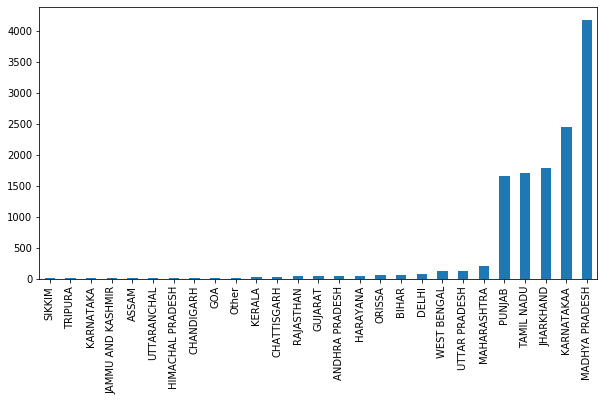

In [69]:
plt.figure(figsize=(10,5))
newdf['State'].value_counts().sort_values().plot.bar()

In [70]:
newdf.groupby("State")["store_code"].nunique().reset_index().sort_values(by='store_code')

,State,store_code
10,JAMMU AND KASHMIR,1
23,TRIPURA,1
12,KARNATAKA,1
6,GOA,1
21,SIKKIM,1
3,CHANDIGARH,2
9,HIMACHAL PRADESH,3
1,ASSAM,3
11,JHARKHAND,4
25,UTTARANCHAL,4


Which stores in most successful states are doing most of the transactions? 

In [71]:
newdf['promo_code'].value_counts()

NONPROMO      8985
0001268186     294
0001213777      92
0001275747      47
0001072310      46
              ... 
4039             1
0001294108       1
0001057037       1
0001206443       1
0001281053       1
Name: promo_code, Length: 1879, dtype: int64

In [72]:
newdf['promo_code'] = newdf['promo_code'].apply(lambda x: '1' if x =='NONPROMO' else 0)
newdf['promo_code'].value_counts()
# 0 if Promo Code is applied and 1 if no promo code has been applied. 

1    8985
0    3702
Name: promo_code, dtype: int64

In [73]:
newdf['discountUsed'].value_counts()

Payback                                             6471
T24Club,Payback                                     2023
BBProfitClub                                        1654
BBProfitClub,Payback                                 929
T24Club,BBProfitClub,Payback                         526
BBSavingsClub                                        232
T24Club,BBProfitClub                                 212
FGShoppingFest,Payback                               164
FGShoppingFest,T24Club,Payback                       128
BBSavingsClub,Payback                                110
FGShoppingFest                                        89
FGShoppingFest,BBProfitClub                           31
FGShoppingFest,T24Club                                26
BBSavingsClub,T24Club,Payback                         18
BBSavingsClub,T24Club                                 17
BBSavingsClub,BBProfitClub                            16
FGShoppingFest,BBProfitClub,Payback                   13
BBSavingsClub,BBProfitClub,Payb

In [74]:
newdf['PaymentUsed'].value_counts()

CASH                      4284
BBProfitClub              1586
UBI CREDIT CARD           1413
SBI CREDIT CARD           1359
HDFC CREDIT CARD           857
ICICI CREDIT CARD          820
AXIS                       578
Cash Back                  371
Payback                    328
GiftVoucher                239
FuturePay                  170
FoodCoupon                 131
FGShoppingFest             113
ParkingCoupon              112
CreditNote                  69
AMEX CREDIT CARD            36
BAJAJ FINSERVE              35
One MobiKwik Systems        34
PATM-PAYTM WALLET           29
UTI                         28
Store Privilage Card        24
ACCOR MEAL VOUCHER          19
SBI Youth Card              17
SUPPLIER GV                 13
CHEQUE                      11
CREDIT NOTE (ISSUES)         8
SOMC                         2
CREDIT NOTE (RECEIPTS)       1
Name: PaymentUsed, dtype: int64

We can combine various payment methods used based on different categories. 

In [75]:
newdf['tender_type'].value_counts()  #maximum customers hav done their payment through cash. 

CASH          4284
PCLB          1586
EDCUBI        1413
EDCSBI        1359
EDCHDFC        857
EDCICICI       820
EDCAXIS        578
CSBK           371
PYOC           328
GVOWN          239
FUTP           170
MVSODEXHO      131
FGSC           113
PARKCOUP       112
CR-NOTE(R)      69
EDCAMEX         36
BFBB            35
MOBI            34
PATM            29
EDCUTI          28
SPCD            24
MVACCOR         19
SFOC            17
GVSUPP          13
CHEQUE          11
CR-NOTE(I)       8
SOMC             2
CCNREDEEM        1
Name: tender_type, dtype: int64

We can tie up with UBI and SBI Credit Card people, as most of our customers are using their credit cards.

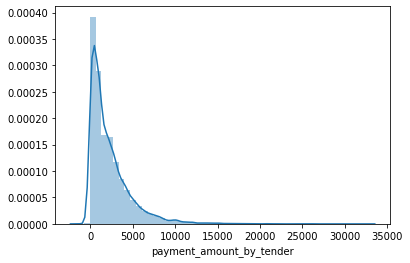

In [77]:
sns.distplot(newdf['payment_amount_by_tender'])

This hows we have some amounts which are in negative too. 
That might mean that customers have returned some items. 


## Top 5 customer analysis (by highest amount spent)

In [80]:
newdf.groupby('customerID')['payment_amount_by_tender'].sum().reset_index().sort_values(by='payment_amount_by_tender',ascending=False)

,customerID,payment_amount_by_tender
5924,BBID_211419317,59572.74
5336,BBID_211412153,43095.64
6103,BBID_211421442,40276.66
6924,BBID_211434738,36447.95
1584,BBID_2043403,33863.87
...,...,...
3651,BBID_2048015,-545.58
3245,BBID_20466750,-566.37
2138,BBID_20444017,-599.00
6714,BBID_211431368,-1064.33


In [83]:
CrosstabResult=pd.crosstab(index=newdf['Gender'],columns=newdf['promo_code'])
print(CrosstabResult)

promo_code     0     1
Gender                
female       886  2346
male        2816  6639


In [84]:
#Assumption(H0): The two columns are NOT related to each other
from scipy.stats import chi2_contingency
 
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.01121019117170556


P-value is less than 0.05 we reject H0, hence the two columns are related to each other

In [85]:
from datetime import datetime, date 

newdf['DOB'] = pd.to_datetime(newdf.DOB,errors='coerce')

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
newdf['age']=newdf['DOB'].apply(lambda x: calculate_age(x))


           customerID        DOB  Gender           State transactionDate  \
0          BBID_20482 1975-10-20    male  MADHYA PRADESH      2016-05-01   
1          BBID_20498 1981-03-19  female     MAHARASHTRA      2015-08-12   
2          BBID_20499 1986-05-10    male     MAHARASHTRA      2016-12-18   
3         BBID_204110 1988-02-29    male  MADHYA PRADESH      2015-12-31   
4         BBID_204149 1977-04-11    male     MAHARASHTRA      2016-11-08   
...               ...        ...     ...             ...             ...   
14460  BBID_211461372 1956-04-26    male       JHARKHAND      2017-05-11   
14461  BBID_211461387 1973-02-03    male       JHARKHAND      2017-05-17   
14462  BBID_211461453 1994-12-10  female       JHARKHAND      2017-04-19   
14463  BBID_211461466 1959-08-25  female       JHARKHAND      2017-04-17   
14465  BBID_211461472 1985-01-01    male       JHARKHAND      2017-05-22   

       store_code  till_no  transaction_number_by_till promo_code  \
0            2655 

In [86]:
newdf.head()

,customerID,DOB,Gender,State,transactionDate,store_code,till_no,transaction_number_by_till,promo_code,discountUsed,tender_type,payment_amount_by_tender,PaymentUsed,age
0,BBID_20482,1975-10-20,male,MADHYA PRADESH,2016-05-01,2655,2,85246,1,Payback,EDCUBI,65.00,UBI CREDIT CARD,45.0
1,BBID_20498,1981-03-19,female,MAHARASHTRA,2015-08-12,2655,13,1064,0,Payback,CASH,768.45,CASH,40.0
2,BBID_20499,1986-05-10,male,MAHARASHTRA,2016-12-18,2615,14,51080,1,Payback,MOBI,1701.24,One MobiKwik Systems,35.0
3,BBID_204110,1988-02-29,male,MADHYA PRADESH,2015-12-31,2655,9,21911,0,Payback,CASH,224.89,CASH,33.0
4,BBID_204149,1977-04-11,male,MAHARASHTRA,2016-11-08,2906,11,33822,0,Payback,EDCSBI,21813.00,SBI CREDIT CARD,44.0


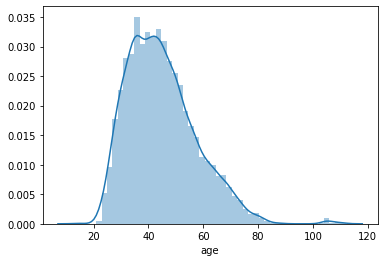

In [87]:
sns.distplot(newdf['age'])

Most of the customers are in the age group 30-50